# GCaMP8s vs GCaMP8m in PV+ interneurons

In [ ]:
import numpy as np

import sys, os
sys.path.append('../physion/src')
import physion

import physion.utils.plot_tools as pt

# data folder:
DATA_folder = '/home/yann.zerlaut/DATA/CIBELE/PV_dendrites_V1/test2024/Assembled/'

In [ ]:
DATASET ={}
for key in ['GCamP8M', 'GCamP8S']:
    DATASET[key] = \
           physion.analysis.read_NWB.scan_folder_for_NWBfiles(os.path.join(DATA_folder, key))

In [16]:
for key in ['GCamP8M', 'GCamP8S']:
    print('\n'+10*'-'+' '+key+' '+10*'-')
    for i, f in enumerate(DATASET[key]['files']):
        print('- %.2d : %s' % (i+1, os.path.basename(f)))


---------- GCamP8M ----------
- 01 : 2024_03_05-13-41-39.nwb
- 02 : 2024_03_05-14-00-11.nwb
- 03 : 2024_03_05-14-19-33.nwb
- 04 : 2024_03_05-14-33-55.nwb
- 05 : 2024_03_05-14-49-29.nwb
- 06 : 2024_03_05-15-07-32zoom4X.nwb
- 07 : 2024_03_05-15-27-33.nwb
- 08 : 2024_03_08-10-59-53.nwb
- 09 : 2024_03_08-11-14-21.nwb
- 10 : 2024_03_08-11-37-42.nwb
- 11 : 2024_03_08-11-53-42.nwb
- 12 : 2024_03_08-12-11-14.nwb
- 13 : 2024_03_08-12-26-26.nwb
- 14 : 2024_03_08-12-40-12.nwb
- 15 : 2024_03_08-12-55-46.nwb

---------- GCamP8S ----------
- 01 : 2024_03_13-16-44-08.nwb
- 02 : 2024_03_22-14-35-26.nwb
- 03 : 2024_03_22-15-00-16taddy.nwb
- 04 : 2024_03_25-14-28-16.nwb
- 05 : 2024_03_25-15-23-50.nwb
- 06 : 2024_03_25-15-49-26.nwb
- 07 : 2024_03_25-16-16-14.nwb
- 08 : 2024_03_25-16-41-58.nwb
- 09 : 2024_03_26-15-19-42.nwb
- 10 : 2024_03_26-16-16-20.nwb
- 11 : 2024_03_26-16-42-38.nwb
- 12 : 2024_03_27-15-07-26.nwb
- 13 : 2024_03_27-16-22-40.nwb
- 14 : 2024_03_29-14-42-14.nwb
- 15 : 2024_03_29-15-09-37.n

In [77]:
Nmax = 1000

for key in ['GCamP8M', 'GCamP8S']:
    
    DATASET[key]['nSessions'] = 0
    DATASET[key]['cResp'] = [[] for c in range(8)]
    
    for filename in DATASET[key]['files'][:Nmax]:
        
        DATASET[key]['nSessions'] += 1
        
        data = physion.analysis.read_NWB.Data(filename,
                                              verbose=False)
        episodes = physion.analysis.process_NWB.EpisodeData(data, 
                                                            quantities=['dFoF'],
                                                            prestim_duration=3.,
                                                            protocol_id=0,
                                                            verbose=False)
        
        
        contrasts = np.unique(episodes.contrast)
        # loop over contrast levels
        for c, contrast in enumerate(contrasts):
            cond = (episodes.angle==90) &\
                        (episodes.contrast==contrast)
            
            # loop over ROIs
            for roi in range(episodes.dFoF.shape[1]):
                
                dFoF = np.mean(episodes.dFoF[cond,roi,:], axis=0)
                DATASET[key]['cResp'][c].append(dFoF-np.mean(dFoF[(episodes.t>-0.5) & (episodes.t<0)]))
                
    DATASET[key]['contrasts'] = contrasts
    DATASET[key]['t'] = episodes.t

/home/yann.zerlaut/miniconda3/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "
/home/yann.zerlaut/miniconda3/lib/python3.8/site-packages/pynwb/base.py:167: UserWarning: Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warn("Length of data does not match length of timestamps. Your data may be transposed. Time should be on "


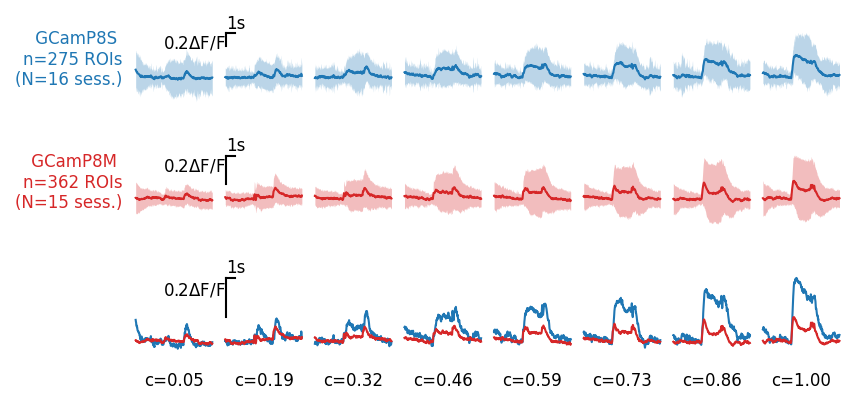

In [80]:
fig, AX = pt.figure(axes=(len(contrasts),3), figsize=(.8,.8),wspace=0.1)

COLORS = ['tab:blue', 'tab:red']

for k, key in enumerate(['GCamP8S', 'GCamP8M']):

    for c, contrast in enumerate(DATASET[key]['contrasts']):
        
        pt.plot(DATASET[key]['t'], np.mean(DATASET[key]['cResp'][c], axis=0), 
                sy=np.std(DATASET[key]['cResp'][c], axis=0),
                color=COLORS[k], ax=AX[k][c])
        
        AX[2][c].plot(DATASET[key]['t'], np.mean(DATASET[key]['cResp'][c], axis=0), color=COLORS[k])
        
    pt.annotate(AX[k][0], ' %s  \nn=%i ROIs \n(N=%i sess.) ' % (key,
                                                                 len(DATASET[key]['cResp'][c]),
                                                                 DATASET[key]['nSessions']),
               (-0.05,1), va='top', ha='right', color=COLORS[k])
    
for c, contrast in enumerate(DATASET[key]['contrasts']):
    pt.annotate(AX[2][c], '\nc=%.2f' % contrast, (0.5,0.), va='top', ha='center')
        
for k in range(3):
    for c in range(8):
        AX[k][c].axis('off')
    pt.set_common_ylims(AX[k])
    pt.draw_bar_scales(AX[k][1], Xbar=1, Xbar_label='1s', Ybar=0.2, Ybar_label='0.2$\Delta$F/F')